In [97]:
import pandas as pd
import random

# Create empty lists for each variable
order_quantity = []
vendor_id = []
prior_delivery_time = []
conditions = []
delivery_distance_km = []
weather_condition = []
lateness = []

# Define the vendor options
vendor_options = ['APA', 'GSP', '3KOM']

# Define weather conditions
weather_conditions = ['Sunny', 'Rainy', 'Cloudy', 'Stormy']

# Define traffic conditions
traffic_conditions = ['Traffic Jams', 'Smooth', 'Burst Tires', 'Accidents', 'Without Obstacles']

# Add random data to the lists
for _ in range(1000):
    order_quantity.append(random.randint(1, 20))
    vendor_id.append(random.choice(vendor_options))
    prior_delivery_time.append(str(random.randint(1, 7)) + ' days')
    condition = random.choice(traffic_conditions)
    conditions.append(condition)
    delivery_distance_km.append(random.randint(100, 500))
    current_weather_condition = random.choice(weather_conditions)
    weather_condition.append(current_weather_condition)
    # Set Lateness to 'Yes' if Conditions is not 'Without Obstacles' and Weather_Condition is not 'Stormy'
    lateness.append('Yes' if condition != 'Without Obstacles' and current_weather_condition != 'Stormy' else 'No')

# Create a DataFrame from the generated data
df = pd.DataFrame({
    'Order_Quantity': order_quantity,
    'Vendor_ID': vendor_id,
    'Prior_Delivery_Time': prior_delivery_time,
    'Conditions': conditions,
    'Delivery_Distance_Km': delivery_distance_km,
    'Weather_Condition': weather_condition,
    'Lateness': lateness
})

# Save the DataFrame to a CSV file
df.to_csv('delivery_note.csv', index=False)
df


,Order_Quantity,Vendor_ID,Prior_Delivery_Time,Conditions,Delivery_Distance_Km,Weather_Condition,Lateness
0,18,3KOM,4 days,Without Obstacles,436,Rainy,No
1,17,APA,7 days,Smooth,168,Sunny,Yes
2,13,GSP,4 days,Without Obstacles,294,Stormy,No
3,17,3KOM,3 days,Burst Tires,256,Rainy,Yes
4,19,APA,6 days,Without Obstacles,363,Sunny,No
...,...,...,...,...,...,...,...
995,18,APA,4 days,Accidents,336,Stormy,No
996,15,APA,6 days,Accidents,349,Rainy,Yes
997,9,APA,7 days,Smooth,383,Sunny,Yes
998,7,GSP,6 days,Accidents,196,Rainy,Yes


## **1. Data Understanding**

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter("ignore", UserWarning)
from sklearn.preprocessing import LabelEncoder

### 1.1 Data Preparing

In [99]:
# Dataset Serangan
df = pd.read_csv('delivery_note.csv')
df

,Order_Quantity,Vendor_ID,Prior_Delivery_Time,Conditions,Delivery_Distance_Km,Weather_Condition,Lateness
0,18,3KOM,4 days,Without Obstacles,436,Rainy,No
1,17,APA,7 days,Smooth,168,Sunny,Yes
2,13,GSP,4 days,Without Obstacles,294,Stormy,No
3,17,3KOM,3 days,Burst Tires,256,Rainy,Yes
4,19,APA,6 days,Without Obstacles,363,Sunny,No
...,...,...,...,...,...,...,...
995,18,APA,4 days,Accidents,336,Stormy,No
996,15,APA,6 days,Accidents,349,Rainy,Yes
997,9,APA,7 days,Smooth,383,Sunny,Yes
998,7,GSP,6 days,Accidents,196,Rainy,Yes


### 1.2 Dataset Info

In [100]:
df.columns

Index(['Order_Quantity', 'Vendor_ID', 'Prior_Delivery_Time', 'Conditions',
       'Delivery_Distance_Km', 'Weather_Condition', 'Lateness'],
      dtype='object')

In [101]:
df.shape

(1000, 7)

In [102]:
df.dtypes

Order_Quantity           int64
Vendor_ID               object
Prior_Delivery_Time     object
Conditions              object
Delivery_Distance_Km     int64
Weather_Condition       object
Lateness                object
dtype: object

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Order_Quantity        1000 non-null   int64 
 1   Vendor_ID             1000 non-null   object
 2   Prior_Delivery_Time   1000 non-null   object
 3   Conditions            1000 non-null   object
 4   Delivery_Distance_Km  1000 non-null   int64 
 5   Weather_Condition     1000 non-null   object
 6   Lateness              1000 non-null   object
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [104]:
df.describe()

,Order_Quantity,Delivery_Distance_Km
count,1000.000000,1000.00000
mean,10.586000,293.71200
std,5.879215,114.98313
min,1.000000,100.00000
25%,5.000000,196.00000
50%,11.000000,291.00000
75%,16.000000,391.00000
max,20.000000,500.00000


## **2. Data Pre-Processing**

### 2.1 Exploratory Data Analyst

In [105]:
# Mapping numeric values

df['Lateness'] = df['Lateness'].map({'Yes': 1, 'No': 0,})

In [106]:
df

,Order_Quantity,Vendor_ID,Prior_Delivery_Time,Conditions,Delivery_Distance_Km,Weather_Condition,Lateness
0,18,3KOM,4 days,Without Obstacles,436,Rainy,0
1,17,APA,7 days,Smooth,168,Sunny,1
2,13,GSP,4 days,Without Obstacles,294,Stormy,0
3,17,3KOM,3 days,Burst Tires,256,Rainy,1
4,19,APA,6 days,Without Obstacles,363,Sunny,0
...,...,...,...,...,...,...,...
995,18,APA,4 days,Accidents,336,Stormy,0
996,15,APA,6 days,Accidents,349,Rainy,1
997,9,APA,7 days,Smooth,383,Sunny,1
998,7,GSP,6 days,Accidents,196,Rainy,1


In [107]:
df['Lateness'].value_counts()

1    613
0    387
Name: Lateness, dtype: int64

In [108]:
df.isnull().sum()

Order_Quantity          0
Vendor_ID               0
Prior_Delivery_Time     0
Conditions              0
Delivery_Distance_Km    0
Weather_Condition       0
Lateness                0
dtype: int64

### 2.2 Data Cleaning

In [109]:
df.dropna()

,Order_Quantity,Vendor_ID,Prior_Delivery_Time,Conditions,Delivery_Distance_Km,Weather_Condition,Lateness
0,18,3KOM,4 days,Without Obstacles,436,Rainy,0
1,17,APA,7 days,Smooth,168,Sunny,1
2,13,GSP,4 days,Without Obstacles,294,Stormy,0
3,17,3KOM,3 days,Burst Tires,256,Rainy,1
4,19,APA,6 days,Without Obstacles,363,Sunny,0
...,...,...,...,...,...,...,...
995,18,APA,4 days,Accidents,336,Stormy,0
996,15,APA,6 days,Accidents,349,Rainy,1
997,9,APA,7 days,Smooth,383,Sunny,1
998,7,GSP,6 days,Accidents,196,Rainy,1


In [110]:
df['Lateness'].value_counts()

1    613
0    387
Name: Lateness, dtype: int64

Text(0.5, 1.0, 'Total Perbandingan Status Keterlambatan Vendor')

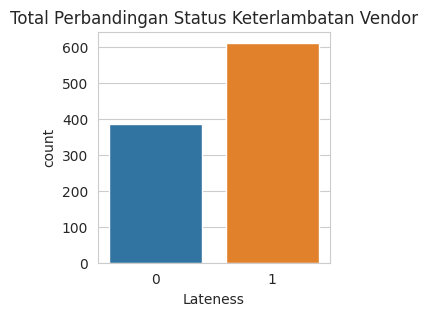

In [111]:
# Bar Chart - Attribute

plt.figure(figsize=(3,3))
sns.countplot(data = df,x = 'Lateness')
plt.title('Total Perbandingan Status Keterlambatan Vendor')

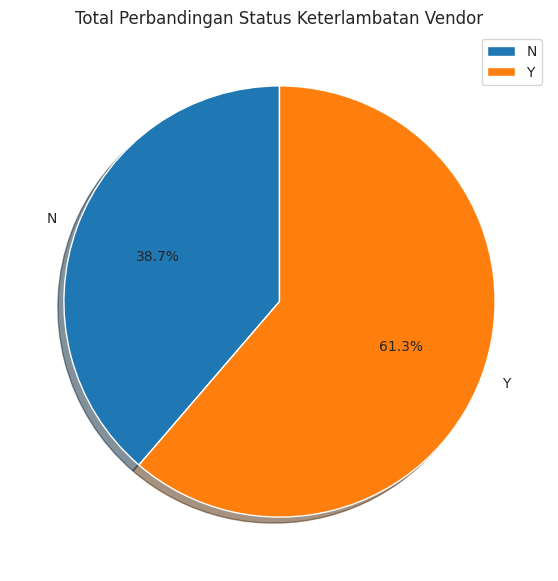

In [112]:
# Perbandingan Data Diabetes atau Tidak
labels = ['N','Y']
sizes = [dict(df.Lateness.value_counts())[0], dict(df.Lateness.value_counts())[1]]
plt.figure(figsize = (7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(['N', 'Y'])
plt.title('Total Perbandingan Status Keterlambatan Vendor')
plt.show()

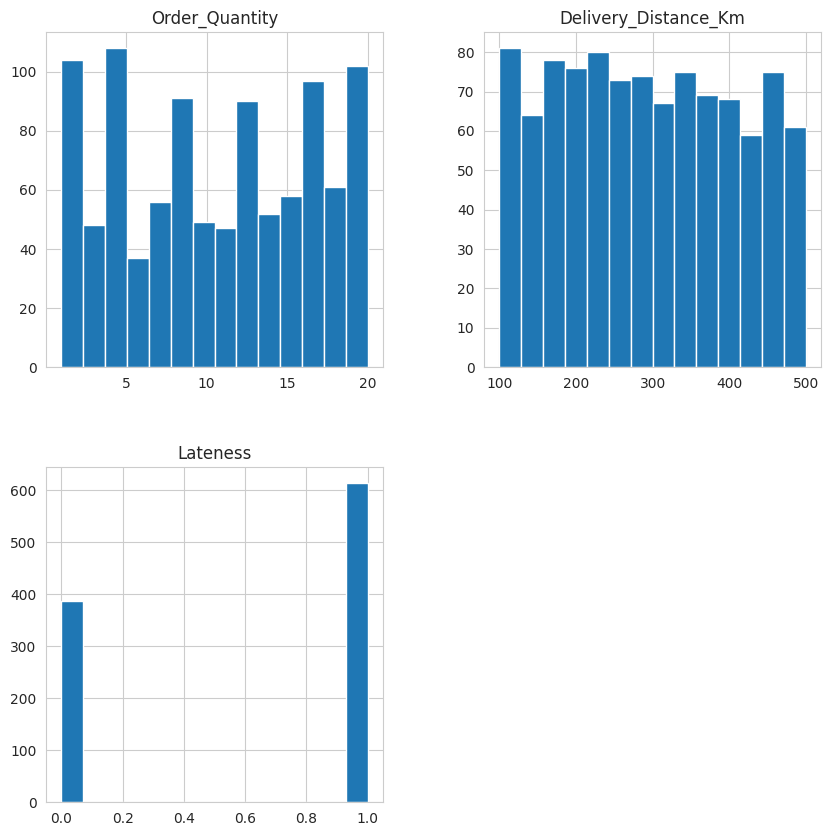

In [113]:
df.hist(bins=14,figsize=(10,10))
plt.show()

In [114]:
# Handling Missing Value
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(df.isna().any(axis=1).sum(), "rows with at least one NaN to remove")
df.dropna(inplace=True)
df.shape

0 rows with at least one NaN to remove


(1000, 7)

In [115]:
# Handling Data Duplicated
print(df.duplicated().sum(), "fully duplicate rows to remove")
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df.shape

0 fully duplicate rows to remove


(1000, 7)

In [116]:
df.columns

Index(['Order_Quantity', 'Vendor_ID', 'Prior_Delivery_Time', 'Conditions',
       'Delivery_Distance_Km', 'Weather_Condition', 'Lateness'],
      dtype='object')

### 2.3 Outlier

In [117]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [118]:
# Add numerical columns as they are
numerical_columns = ['Order_Quantity', 'Delivery_Distance_Km', 'Lateness']

In [119]:
# Perform encoding for categorical columns
df['Vendor_ID'] = label_encoder.fit_transform(df['Vendor_ID'])
df['Prior_Delivery_Time'] = label_encoder.fit_transform(df['Prior_Delivery_Time'])
df['Conditions'] = label_encoder.fit_transform(df['Conditions'])
df['Weather_Condition'] = label_encoder.fit_transform(df['Weather_Condition'])

In [120]:
# Combine all columns
all_columns = ['Vendor_ID', 'Prior_Delivery_Time', 'Conditions', 'Weather_Condition', 'Order_Quantity', 'Delivery_Distance_Km', 'Lateness']

In [121]:
# Create a new DataFrame with encoded values
df_n = df[all_columns]

In [122]:
# Display the encoded DataFrame
print(df_n)

     Vendor_ID  Prior_Delivery_Time  Conditions  Weather_Condition  \
0            0                    3           4                  1   
1            1                    6           2                  3   
2            2                    3           4                  2   
3            0                    2           1                  1   
4            1                    5           4                  3   
..         ...                  ...         ...                ...   
995          1                    3           0                  2   
996          1                    5           0                  1   
997          1                    6           2                  3   
998          2                    5           0                  1   
999          1                    4           4                  2   

     Order_Quantity  Delivery_Distance_Km  Lateness  
0                18                   436         0  
1                17                   168         1

In [123]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Vendor_ID             1000 non-null   int64
 1   Prior_Delivery_Time   1000 non-null   int64
 2   Conditions            1000 non-null   int64
 3   Weather_Condition     1000 non-null   int64
 4   Order_Quantity        1000 non-null   int64
 5   Delivery_Distance_Km  1000 non-null   int64
 6   Lateness              1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


<Axes: >

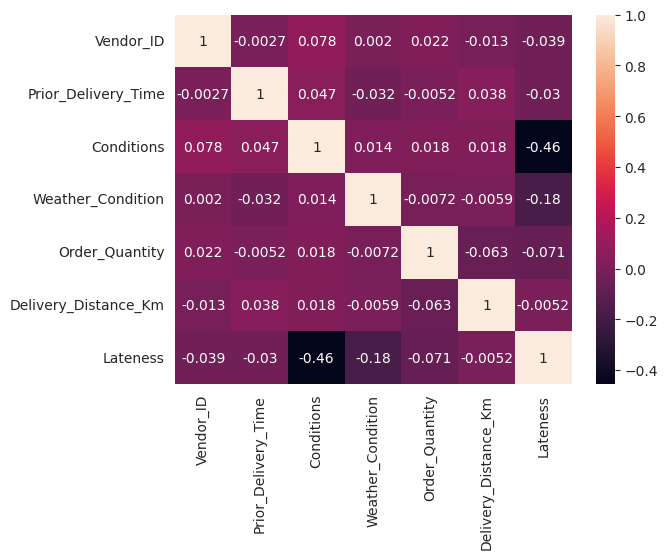

In [124]:
corrmat=df_n.corr()
sns.heatmap(corrmat, annot=True)

In [125]:
df_n.columns

Index(['Vendor_ID', 'Prior_Delivery_Time', 'Conditions', 'Weather_Condition',
       'Order_Quantity', 'Delivery_Distance_Km', 'Lateness'],
      dtype='object')

In [126]:
df_n

,Vendor_ID,Prior_Delivery_Time,Conditions,Weather_Condition,Order_Quantity,Delivery_Distance_Km,Lateness
0,0,3,4,1,18,436,0
1,1,6,2,3,17,168,1
2,2,3,4,2,13,294,0
3,0,2,1,1,17,256,1
4,1,5,4,3,19,363,0
...,...,...,...,...,...,...,...
995,1,3,0,2,18,336,0
996,1,5,0,1,15,349,1
997,1,6,2,3,9,383,1
998,2,5,0,1,7,196,1


### 2.4 Feature Selection with Principal Component Analysis

<Axes: xlabel='Lateness'>

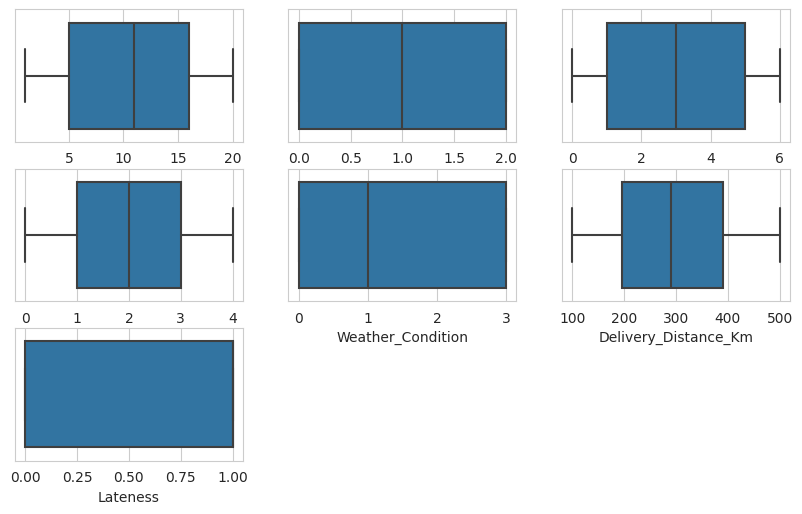

In [127]:
plt.figure(figsize=(10,10))
sns.set_style(style='whitegrid')
plt.subplot(5,3,1)
sns.boxplot(x='Order_Quantity',data=df_n)
plt.subplot(5,3,2)
sns.boxplot(x='Vendor_ID',data=df_n)
plt.subplot(5,3,3)
sns.boxplot(x='Prior_Delivery_Time',data=df_n)
plt.subplot(5,3,4)
sns.boxplot(x='Conditions',data=df_n)
plt.subplot(5,3,5)
sns.boxplot(x='Weather_Condition',data=df_n)
plt.subplot(5,3,6)
sns.boxplot(x='Delivery_Distance_Km',data=df_n)
plt.subplot(5,3,7)
sns.boxplot(x='Lateness',data=df_n)


In [128]:
df_n.columns

Index(['Vendor_ID', 'Prior_Delivery_Time', 'Conditions', 'Weather_Condition',
       'Order_Quantity', 'Delivery_Distance_Km', 'Lateness'],
      dtype='object')

## 2.5 Split the Data Frame into X and Y

In [129]:
target_name='Lateness'
y= df_n[target_name] #given predictions - training data
X= df_n[['Vendor_ID', 'Prior_Delivery_Time', 'Conditions', 'Weather_Condition', 'Order_Quantity', 'Delivery_Distance_Km']]#dropping the Outcome column and keeping all other columns as X

In [130]:
y

0      0
1      1
2      0
3      1
4      0
      ..
995    0
996    1
997    1
998    1
999    0
Name: Lateness, Length: 1000, dtype: int64

In [131]:
X

,Vendor_ID,Prior_Delivery_Time,Conditions,Weather_Condition,Order_Quantity,Delivery_Distance_Km
0,0,3,4,1,18,436
1,1,6,2,3,17,168
2,2,3,4,2,13,294
3,0,2,1,1,17,256
4,1,5,4,3,19,363
...,...,...,...,...,...,...
995,1,3,0,2,18,336
996,1,5,0,1,15,349
997,1,6,2,3,9,383
998,2,5,0,1,7,196


## TRAIN TEST SPLIT

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)#splitting data in 80% train, 20%test

print("Train :", X_train.shape,y_train.shape)

print('Test :',X_test.shape,y_test.shape)

Train : (800, 6) (800,)
Test : (200, 6) (200,)


## **3. Modelling Naive Bayes**

In [133]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# Train Decision Tree Classifer
gnb = gnb.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [134]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score
print("accuracy score:", (accuracy_score(y_pred, y_test))*100, "%")

accuracy score: 77.5 %


## **4. Buat Model Untuk Ke Aplikasi**

In [135]:
X=df_n.iloc[:,0:2].values
y=df_n.iloc[:,2].values

In [136]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 42)

In [137]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
persamaan=gnb.fit(X_train,y_train)

In [138]:
yprediksi=persamaan.predict(X_test)
print(yprediksi)
from sklearn.metrics import mean_squared_error
import numpy as np
nilaimse=mean_squared_error(yprediksi,y_test)
nilairmse=np.sqrt(nilaimse)
print(nilaimse)
print(nilairmse)

[0 4 2 0 0 0 2 0 4 0 2 0 0 0 0 2 4 2 0 4 4 0 3 4 0 2 4 4 4 2 4 0 0 4 0 0 0
 4 0 0 0 2 2 0 4 0 0 4 0 0 0 0 0 4 0 0 0 4 0 0 2 4 2 0 4 0 4 0 3 0 0 0 4 4
 4 0 0 4 4 0 0 4 0 2 0 4 4 0 0 0 0 4 2 0 4 2 2 0 0 4 0 3 4 3 4 4 0 3 2 2 4
 4 0 0 2 0 0 0 4 0 4 0 2 0 0 2 0 0 4 4 3 2 4 0 0 0 4 0 4 0 3 4 4 0 4 0 4 0
 0 0 4 4 4 0 0 0 4 4 0 2 2 4 4 4 0 0 0 2 0 0 2 4 4 4 4 3 4 0 4 0 2 0 4 0 0
 4 4 4 4 0 4 3 4 4 0 4 4 0 0 4]
5.045
2.24610774452162


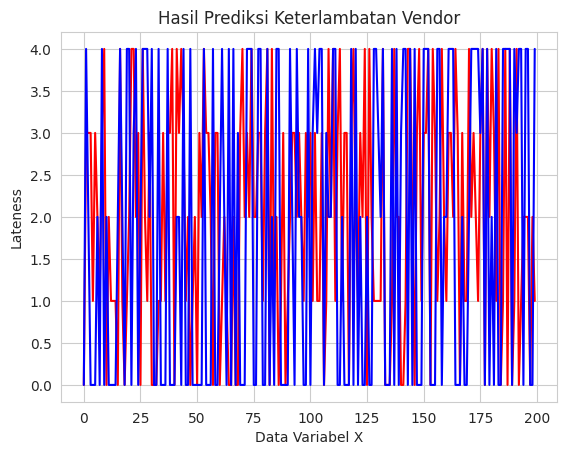

In [139]:
import matplotlib.pyplot as plt
l = range(len(X_test))
plt.plot(l, y_test, color = 'red')
plt.plot(l, yprediksi, color = 'blue')
plt.title('Hasil Prediksi Keterlambatan Vendor')
plt.xlabel('Data Variabel X')
plt.ylabel('Lateness')
plt.show()

In [140]:
# import pickle
# pd.to_pickle(persamaan, "vendor.models")

In [141]:
import pickle

# Assuming vendor_model is your trained model
vendor_model = ...

# Save the model
with open('vendor_model.sav', 'wb') as model_file:
    pickle.dump(vendor_model, model_file)


In [142]:
# from flask import Flask, send_file

# app = Flask(__name__)

# @app.route('/download_model')
# def download_model():
#     model_path = 'vendor_model.sav'
#     return send_file(model_path, as_attachment=True)

# if __name__ == '__main__':
#     app.run()
